## Executive Summary

### Idea

- For this project I am looking to see if there is a pay gap between genders and ethnicity for employees working for the city of San Antonio TX

- I am using the **Fiscal Year 2020 City Compensation Report** database off the City of San Antonio website

- Website to find data https://www.sanantonio.gov/Finance/bfi/CityComp2

### Goal

- Analyze and model using salary data from fiscal year 2020
- Looking for pay gaps in gender
- Looking for pay gaps for ethnicity
 
### Findings

- There is a salary gap based on gender and on ethnicity

- Model performance has 75% accuracy when using features like salary, gender and ethnicity

### Recommendations & next steps:

- Recommend that the city research further into the pay gaps and the possible reasons they have those gaps in salaries 

- Recommend that they look into developing a program to bring equality across gender and ethnicity

### If I had more time:

- I would like to split up the salaries by department and time employeed to further investigating pay gap discrepancies
- Try other models and features

- Compare data from previous years to see if there is a trend

### Pipeline Stages Breakdown

**Plan -> Acquire -> Prepare -> Explore -> Model -> Deliver**

- Create README.md with data dictionary, project and goals, come up with initial hypotheses
- Acquire data 
- Clean and prepare data for the first iteration through the pipeline, MVP preparation.
- Create a functions to automate the process, store the function and prepare data in Final Report Notebook by importing and using the funtions.
- Clearly define hypotheses, set an alpha, run the statistical tests needed, reject or fail to reject the Null Hypothesis, and document findings and takeaways.
- Establish a baseline accuracy and document well.
- Train atleast two different classification models.
- Evaluate models on train and validate datasets.
- Choose the model with that performs the best and evaluate that single model on the test dataset.
- Create .csv file with the model's predictions.
- Document conclusions, takeaways, and next steps in the Final Report Notebook.


### Imports

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import explore
from scipy import stats
from pandas.api.types import is_string_dtype, is_numeric_dtype
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from datetime import date 
from wrangle import *
from model import *


### Acquire

- retrieved the data from the City of San Antonio website https://www.sanantonio.gov/Finance/bfi/CityComp2 
- downloaded and used the Fiscal Year 2020 City Compensation Report
- open .xlxs file and delete rows 1 thur 14. Rows have description about the data

In [2]:
df = new_data()

In [3]:
df.head()

,FIRST NAME,MIDDLE NAME,LAST NAME,EMPLOYEE CATEGORY,HIRE DATE1,FY20 ANNUAL SALARY2,FY20 BASE PAY3,FY20 LEAVE PAYOUT4,FY20 OTHER5,FY20 ARBITRATION & SETTLEMENTS6,FY20 OVERTIME7,FY20 GROSS EARNINGS8,FY20 ADDITIONAL BENEFITS9,FY20 TOTAL COMPENSATION10,JOB TITLE,BUSINESS AREA,GENDER,ETHNIC ORIGIN11,EMPLOYEE SUBGROUP,WITHDRAW DATE
REF #,,,,,,,,,,,,,,,,,,,,
1,LEE,RUDOLPH,RAKUN,UNIFORM,1993-03-08,99612.24,34098.04,167323.59,19118.30,149779.73,0.0,370319.66,76707.476938,447027.136938,0605-POLICE LIEUTENANT,POLICE,MALE,WHITE (NON HISPANIC OR LATINO),UNIFORM WITHDRAWN,2020-01-31
2,ERIK,J,WALSH,CIVILIAN,1994-06-06,312000.00,312000.00,12000.00,28003.63,0.00,0.0,352003.63,88617.260000,440620.890000,1022-CITY MANAGER,CITY MANAGER,MALE,HISPANIC OR LATINO,2A CITY MGR FT,NaT
3,ANTHONY,L,TREVINO,UNIFORM,1993-03-08,164244.08,123072.84,228090.31,7945.00,0.00,0.0,359108.15,61208.971803,420317.121803,0678-ASSISTANT POLICE CHIEF,POLICE,MALE,HISPANIC OR LATINO,UNIFORM WITHDRAWN,2020-06-19
4,ANDREW,NaN,SEGOVIA,CIVILIAN,2016-08-29,299625.82,298965.24,22876.80,13531.36,0.00,0.0,335373.40,66114.130590,401487.530590,1000-CITY ATTORNEY,CITY ATTORNEY,MALE,HISPANIC OR LATINO,2B DEPT DIR FT,NaT
5,MARIA,D,VILLAGOMEZ,CIVILIAN,1997-09-29,258825.32,257692.50,9808.00,10664.86,0.00,0.0,278165.36,64040.174230,342205.534230,1021-DEPUTY CITY MANAGER,CITY MANAGER,FEMALE,HISPANIC OR LATINO,2B DEPT DIR FT,NaT


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
FY20 ANNUAL SALARY2,13394.0,55521.580961,22981.416918,1683.6,36861.240000,53748.240000,69024.020000,312000.000000
FY20 BASE PAY3,13394.0,49687.924488,27377.082313,0.0,33565.075000,49110.030000,67296.060000,312000.000000
FY20 LEAVE PAYOUT4,13394.0,2444.000389,9474.905325,0.0,0.000000,511.040000,2257.600000,228090.310000
FY20 OTHER5,13394.0,5951.035010,8193.827200,-520.0,20.575000,1051.935000,11100.655000,48096.500000
FY20 ARBITRATION & SETTLEMENTS6,13394.0,23.242804,1707.182270,0.0,0.000000,0.000000,0.000000,149779.730000
FY20 OVERTIME7,13394.0,4757.563523,10183.023333,0.0,0.000000,396.815000,4696.507500,127924.290000
FY20 GROSS EARNINGS8,13394.0,62863.766215,40296.579920,0.0,35406.842500,55366.295000,90326.262500,370319.660000
FY20 ADDITIONAL BENEFITS9,13394.0,26455.308588,17431.640885,0.0,16356.172067,20513.238179,46599.801002,91327.440952
FY20 TOTAL COMPENSATION10,13394.0,89319.074803,56367.708927,0.0,51565.623357,75983.950013,135188.765152,447027.136938


In [5]:
print(f'Original dataframe has {df.shape[0]} rows and {df.shape[1]} columns.')

Original dataframe has 13394 rows and 20 columns.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13394 entries, 1 to 13394
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   FIRST NAME                       13394 non-null  object        
 1   MIDDLE NAME                      5979 non-null   object        
 2   LAST NAME                        13394 non-null  object        
 3   EMPLOYEE CATEGORY                13394 non-null  object        
 4   HIRE DATE1                       13394 non-null  datetime64[ns]
 5   FY20 ANNUAL SALARY2              13394 non-null  float64       
 6   FY20 BASE PAY3                   13394 non-null  float64       
 7   FY20 LEAVE PAYOUT4               13394 non-null  float64       
 8   FY20 OTHER5                      13394 non-null  float64       
 9   FY20 ARBITRATION & SETTLEMENTS6  13394 non-null  float64       
 10  FY20 OVERTIME7                   13394 non-null  float64  

In [7]:
list(df.columns)

['FIRST NAME',
 'MIDDLE NAME',
 'LAST NAME',
 'EMPLOYEE CATEGORY',
 'HIRE DATE1',
 'FY20 ANNUAL SALARY2',
 'FY20 BASE PAY3',
 'FY20 LEAVE PAYOUT4',
 'FY20 OTHER5',
 'FY20 ARBITRATION & SETTLEMENTS6',
 'FY20 OVERTIME7',
 'FY20 GROSS EARNINGS8',
 'FY20 ADDITIONAL BENEFITS9',
 'FY20 TOTAL COMPENSATION10',
 'JOB TITLE',
 'BUSINESS AREA',
 'GENDER',
 'ETHNIC ORIGIN11',
 'EMPLOYEE SUBGROUP',
 'WITHDRAW DATE']

In [8]:
missing_zero_values_table(df)

Your selected dataframe has 20 columns and 13394 Rows.
There are 2 columns that have NULL values.


,Zero Values,null_count,% of Total Values,Total Zeroes + Null Values,% Total Zero + Null Values,Data Type
WITHDRAW DATE,0,12198,91.1,12198,91.1,datetime64[ns]
MIDDLE NAME,0,7415,55.4,7415,55.4,object
EMPLOYEE SUBGROUP,0,0,0.0,0,0.0,object
ETHNIC ORIGIN11,0,0,0.0,0,0.0,object
GENDER,0,0,0.0,0,0.0,object
BUSINESS AREA,0,0,0.0,0,0.0,object
JOB TITLE,0,0,0.0,0,0.0,object
FY20 TOTAL COMPENSATION10,11,0,0.0,11,0.1,float64
FY20 ADDITIONAL BENEFITS9,23,0,0.0,23,0.2,float64
FY20 GROSS EARNINGS8,20,0,0.0,20,0.1,float64


### Prepare


- Changed column names for readability
- Created dummy columns of encoded categorical variabl
- Combine the original data frame with the new dummies columns
- Create new column called year
- Created 'today' variable to calculate a new column called years_employed
- Reorganized ethnicity column/replace values with similiar groupings
- Rounded all numeric columns
- Seperated job_title into job_id & job name column using split
- Dropped Duplicates
- Dropped unessary columns ['first_name', 'middle_name', 'last_name', 'employee_category', 'dept_subgroup', 'year', 'job_title', 'hire_date', 'withdraw_date']
- Removed annual salary outliers to anything less than $250,000

In [9]:
df = clean_data(df)

In [10]:
missing_zero_values_table(df)

Your selected dataframe has 23 columns and 13391 Rows.
There are 0 columns that have NULL values.


,Zero Values,null_count,% of Total Values,Total Zeroes + Null Values,% Total Zero + Null Values,Data Type
annual_salary_2020,0,0,0.0,0,0.0,float64
years_employed,0,0,0.0,0,0.0,int64
ethnicity_UNKNOWN,13390,0,0.0,13390,100.0,uint8
ethnicity_OTHER,13127,0,0.0,13127,98.0,uint8
ethnicity_NATIVE HAWAIIAN,13358,0,0.0,13358,99.8,uint8
ethnicity_NATIVE AMERICAN,13334,0,0.0,13334,99.6,uint8
ethnicity_HISPANIC,4991,0,0.0,4991,37.3,uint8
ethnicity_BLACK,12603,0,0.0,12603,94.1,uint8
ethnicity_ASIAN,13235,0,0.0,13235,98.8,uint8
job_name,0,0,0.0,0,0.0,object


In [11]:
df.head()

,annual_salary_2020,base_pay_2020,leave_payout_2020,other_2020,arbitration_and_settlements,overtime_2020,gross_earnings_2020,additional_compensation,total_compensation,department,...,job_id,job_name,ethnicity_ASIAN,ethnicity_BLACK,ethnicity_HISPANIC,ethnicity_NATIVE AMERICAN,ethnicity_NATIVE HAWAIIAN,ethnicity_OTHER,ethnicity_UNKNOWN,ethnicity_WHITE
REF #,,,,,,,,,,,,,,,,,,,,,
1,99612.0,34098.0,167324.0,19118.0,149780.0,0.0,370320.0,76707.0,447027.0,POLICE,...,0605,POLICE LIEUTENANT,0,0,0,0,0,0,0,1
3,164244.0,123073.0,228090.0,7945.0,0.0,0.0,359108.0,61209.0,420317.0,POLICE,...,0678,ASSISTANT POLICE CHIEF,0,0,1,0,0,0,0,0
6,99612.0,86133.0,170872.0,26574.0,0.0,4630.0,288209.0,50948.0,339157.0,POLICE,...,0605,POLICE LIEUTENANT,0,0,0,0,0,0,0,1
7,152076.0,105181.0,175623.0,6660.0,0.0,0.0,287464.0,48814.0,336278.0,POLICE,...,0608,DEPUTY CHIEF,0,0,0,0,0,0,0,1
8,94932.0,94932.0,5168.0,34150.0,0.0,127924.0,262174.0,65572.0,327746.0,FIRE AND EMS,...,0664,DISTRICT FIRE CHIEF,0,0,1,0,0,0,0,0


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
annual_salary_2020,13391.0,55469.023747,22711.449079,1684.0,36861.0,53748.0,69024.0,233931.0
base_pay_2020,13391.0,49634.201031,27141.470365,0.0,33560.5,49104.0,67296.0,232907.0
leave_payout_2020,13391.0,2441.213726,9473.749412,0.0,0.0,511.0,2257.5,228090.0
other_2020,13391.0,5948.470241,8192.166491,-520.0,20.5,1051.0,11084.0,48096.0
arbitration_and_settlements,13391.0,23.248002,1707.374954,0.0,0.0,0.0,0.0,149780.0
overtime_2020,13391.0,4758.628556,10183.914069,0.0,0.0,397.0,4697.5,127924.0
gross_earnings_2020,13391.0,62805.742215,40111.381954,0.0,35404.5,55358.0,90282.0,370320.0
additional_compensation,13391.0,26444.899037,17418.912317,0.0,16355.5,20512.0,46597.5,91327.0
total_compensation,13391.0,89250.643193,56185.004268,0.0,51563.0,75974.0,135158.0,447027.0
years_employed,13391.0,11.599656,9.385236,1.0,4.0,9.0,19.0,53.0


prep take-ways:

- annual_salary, ethnicity, and gender will probably be the most beneficial features to explore
- dummies columns will be useufl for bivariate exploration


### Explore

- univariate exploration

In [13]:
cat_vars = ['gender', 'ethnicity_BLACK', 'ethnicity_HISPANIC', 'ethnicity_WHITE', 'ethnicity_ASIAN', 'ethnicity_NATIVE AMERICAN', 'ethnicity_NATIVE HAWAIIAN', 'ethnicity_OTHER']
quant_vars = ['annual_salary_2020','total_compensation', 'years_employed']

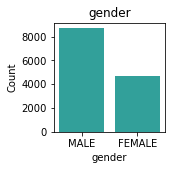

        gender  Count  Percent
MALE      MALE   8712    65.06
FEMALE  FEMALE   4679    34.94
_________________________________________________________________


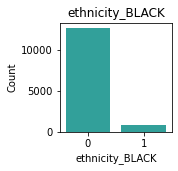

   ethnicity_BLACK  Count  Percent
0                0  12603    94.12
1                1    788     5.88
_________________________________________________________________


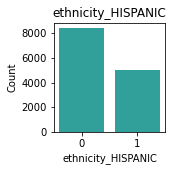

   ethnicity_HISPANIC  Count  Percent
1                   0   8400    62.73
0                   1   4991    37.27
_________________________________________________________________


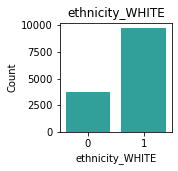

   ethnicity_WHITE  Count  Percent
0                1   9699    72.43
1                0   3692    27.57
_________________________________________________________________


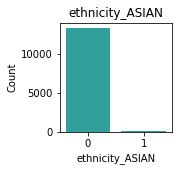

   ethnicity_ASIAN  Count  Percent
0                0  13235    98.84
1                1    156     1.16
_________________________________________________________________


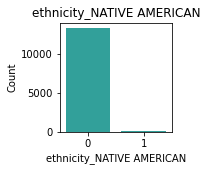

   ethnicity_NATIVE AMERICAN  Count  Percent
0                          0  13334    99.57
1                          1     57     0.43
_________________________________________________________________


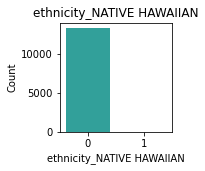

   ethnicity_NATIVE HAWAIIAN  Count  Percent
0                          0  13358    99.75
1                          1     33     0.25
_________________________________________________________________


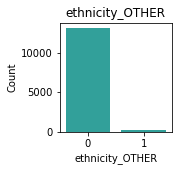

   ethnicity_OTHER  Count  Percent
0                0  13127    98.03
1                1    264     1.97
_________________________________________________________________


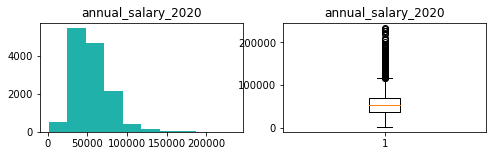

count     13391.000000
mean      55469.023747
std       22711.449079
min        1684.000000
25%       36861.000000
50%       53748.000000
75%       69024.000000
max      233931.000000
Name: annual_salary_2020, dtype: float64


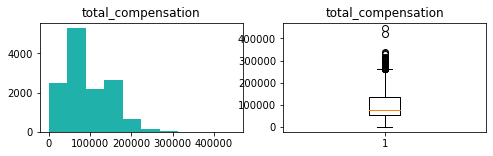

count     13391.000000
mean      89250.643193
std       56185.004268
min           0.000000
25%       51563.000000
50%       75974.000000
75%      135158.000000
max      447027.000000
Name: total_compensation, dtype: float64


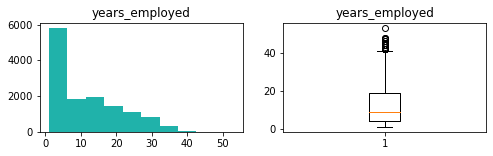

count    13391.000000
mean        11.599656
std          9.385236
min          1.000000
25%          4.000000
50%          9.000000
75%         19.000000
max         53.000000
Name: years_employed, dtype: float64


In [14]:
explore.explore_univariate(df, cat_vars, quant_vars)

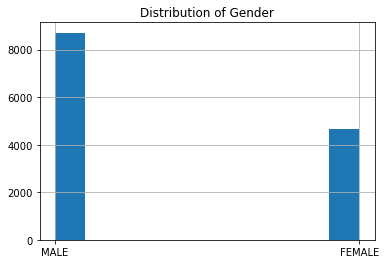

In [15]:
df['gender'].hist()
plt.title('Distribution of Gender')
plt.show()

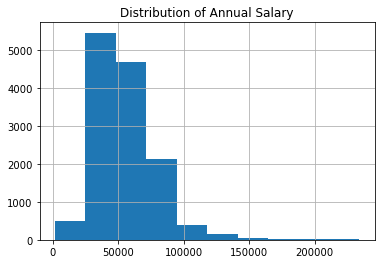

In [16]:
df.annual_salary_2020.hist()
plt.title('Distribution of Annual Salary')
plt.show()

In [17]:
df.annual_salary_2020.min()

1684.0

In [18]:
df.annual_salary_2020.max()

233931.0

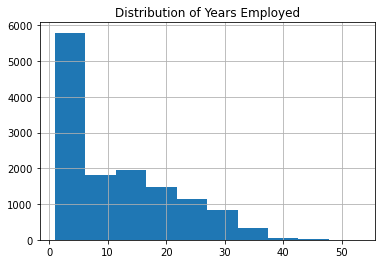

In [19]:
df.years_employed.hist()
plt.title('Distribution of Years Employed')
plt.show()

In [20]:
df.groupby('ethnicity').years_employed.median()

ethnicity
ASIAN               7
BLACK               7
HISPANIC            8
NATIVE AMERICAN    14
NATIVE HAWAIIAN     8
OTHER               4
UNKNOWN             2
WHITE              11
Name: years_employed, dtype: int64

In [21]:
df.groupby('ethnicity').years_employed.max()

ethnicity
ASIAN              41
BLACK              48
HISPANIC           47
NATIVE AMERICAN    36
NATIVE HAWAIIAN    33
OTHER              38
UNKNOWN             2
WHITE              53
Name: years_employed, dtype: int64

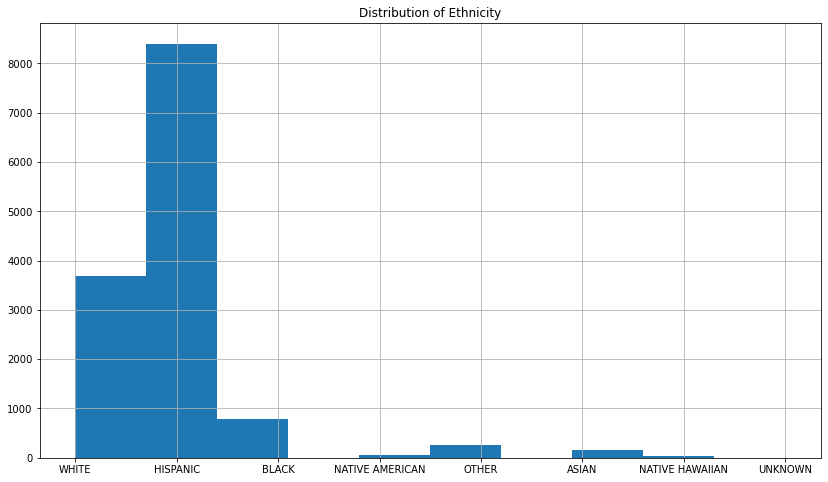

In [22]:
df.ethnicity.hist(figsize=(14,8))
plt.title('Distribution of Ethnicity')
plt.show()

In [23]:
df.ethnicity.value_counts()

HISPANIC           8400
WHITE              3692
BLACK               788
OTHER               264
ASIAN               156
NATIVE AMERICAN      57
NATIVE HAWAIIAN      33
UNKNOWN               1
Name: ethnicity, dtype: int64

take-aways:

able to see the amount of employees by ethnicity, gender and years employed

### Split Data

In [24]:
train, validate, test = train_validate_test_split(df, seed=123)

In [25]:
train.shape, validate.shape, test.shape

((7498, 23), (3214, 23), (2679, 23))

In [26]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
annual_salary_2020,7498.0,55513.357962,22853.941916,3729.0,36986.00,53748.0,69024.00,232298.0
base_pay_2020,7498.0,49671.399840,27282.730068,0.0,33523.25,48917.5,67296.00,231786.0
leave_payout_2020,7498.0,2409.292611,9300.787018,0.0,0.00,516.0,2275.00,177015.0
other_2020,7498.0,5843.120832,8107.897647,0.0,16.00,1022.0,10825.25,40265.0
arbitration_and_settlements,7498.0,40.755535,2280.676701,0.0,0.00,0.0,0.00,149780.0
overtime_2020,7498.0,4555.451987,9690.557369,0.0,0.00,372.5,4515.50,126774.0
gross_earnings_2020,7498.0,62520.002667,39846.011067,0.0,35301.50,55220.5,89952.25,370320.0
additional_compensation,7498.0,26290.920379,17314.532303,0.0,16378.25,20446.5,46361.25,91327.0
total_compensation,7498.0,88810.921446,55834.871147,0.0,51404.75,75653.0,134550.50,447027.0
years_employed,7498.0,11.611096,9.300534,1.0,4.00,9.0,19.00,48.0


In [27]:
train.isnull().values.any(), validate.isnull().values.any(), test.isnull().values.any()

(False, False, False)

In [28]:
train.ethnicity.value_counts()

HISPANIC           4685
WHITE              2068
BLACK               439
OTHER               158
ASIAN                96
NATIVE AMERICAN      31
NATIVE HAWAIIAN      21
Name: ethnicity, dtype: int64

In [29]:
train.loc[df['annual_salary_2020'] > 225_000].gender.value_counts()

MALE      3
FEMALE    1
Name: gender, dtype: int64

More than twice as many men are making more than $225,000 working at the city than women

In [30]:
train.loc[df['annual_salary_2020'] > 200_000].gender.value_counts()

MALE      5
FEMALE    2
Name: gender, dtype: int64

More than twice as many men are making more than $200,000 working at the city than women

In [31]:
train.loc[df['annual_salary_2020'] > 150_000].gender.value_counts()

MALE      25
FEMALE    13
Name: gender, dtype: int64

Almost twice as many men are making more than $150,000 working at the city than women

In [32]:
train.loc[df['annual_salary_2020'] > 100_000].gender.value_counts()

MALE      156
FEMALE    113
Name: gender, dtype: int64

More men than women are making more than $100,000 working at the city

In [33]:
train.loc[df['annual_salary_2020'] > 75_000].gender.value_counts()

MALE      871
FEMALE    307
Name: gender, dtype: int64

Almost three times as many men than women are making more than $75,000 working at the city

In [34]:
train.loc[df['annual_salary_2020'] > 50_000].gender.value_counts()

MALE      3025
FEMALE     986
Name: gender, dtype: int64

More than three times as many men than women are making more than $50,000 working at the city

In [35]:
train.loc[df['annual_salary_2020'] < 35_000].gender.value_counts()

FEMALE    767
MALE      707
Name: gender, dtype: int64

A more females are making less than $35,000, although the distribution is almost even

In [36]:
train.loc[train['annual_salary_2020'] > 150_000].ethnicity.value_counts()

WHITE       23
HISPANIC    10
ASIAN        3
BLACK        2
Name: ethnicity, dtype: int64

Those who idenfity their ethnicity as 'WHITE' make up a majority of those who make more than $150,000 annually

In [37]:
train.loc[train['annual_salary_2020'] > 100_000].ethnicity.value_counts()

WHITE       129
HISPANIC    105
BLACK        17
ASIAN        10
OTHER         8
Name: ethnicity, dtype: int64

Those who idenfity their ethnicity as 'WHITE' make up a majority of those who make more than $100,000 annually

In [38]:
train.loc[train['annual_salary_2020'] > 75_000].ethnicity.value_counts()

WHITE              532
HISPANIC           518
BLACK               70
ASIAN               33
OTHER               20
NATIVE AMERICAN      3
NATIVE HAWAIIAN      2
Name: ethnicity, dtype: int64

Those who idenfity their ethnicity as 'WHITE' make up a majority of those who make more than $75,000 annually, although the distribution is almost even with those who idenfity their ethnicity as 'HISPANIC'

In [39]:
train.loc[train['annual_salary_2020'] < 75_000].ethnicity.value_counts()

HISPANIC           4167
WHITE              1536
BLACK               369
OTHER               138
ASIAN                63
NATIVE AMERICAN      28
NATIVE HAWAIIAN      19
Name: ethnicity, dtype: int64

More than double those who idenfity their ethnicity as 'HISPANIC' make up a majority of those who make less than $75,000 annually compaired to those who idenfity their ethnicity as 'WHITE', however when compaired to the value count of employeed "HISPANIC 4685 and WHITE 2068 " I do not feel it an issue, but would like to look into it further 

- There is wider range of salaries within those who idenfity as hispanic since they make up a majority of the employees at the city

visualize correation, demographic and salary

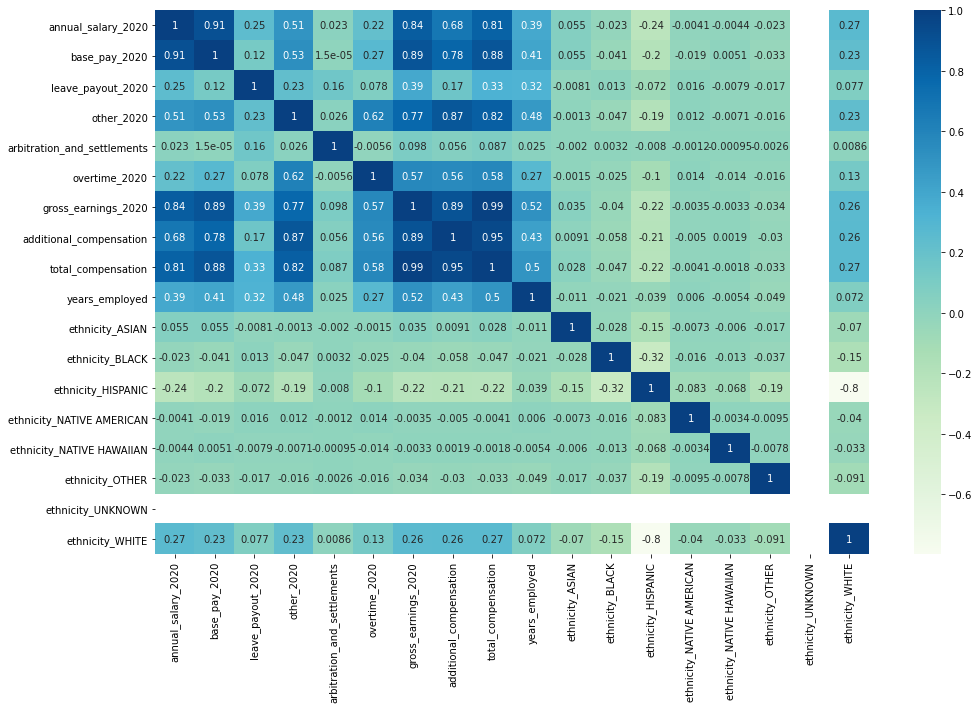

In [40]:
# heatmap

plt.figure(figsize=(16,10))
correlation = train.corr()
sns.heatmap(correlation, cmap = "GnBu", annot = True)

plt.show()

visualize gender and salary disparity


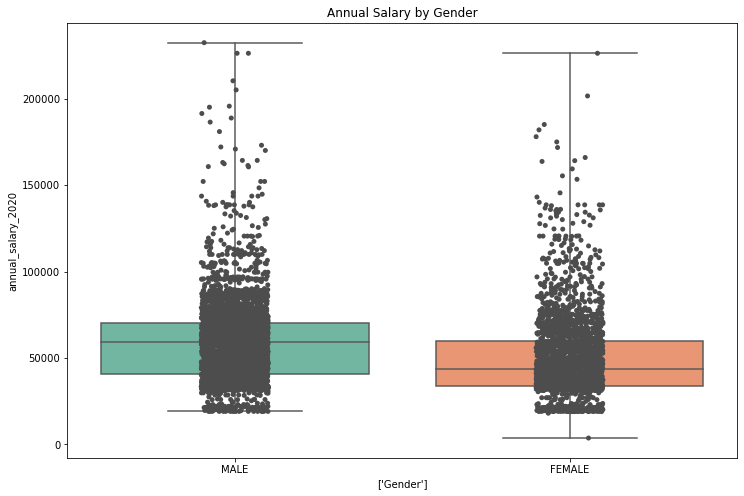

In [41]:
plt.figure(figsize=(12,8))

ax = sns.boxplot(x="gender", y="annual_salary_2020", data=train,whis=np.inf, palette="Set2" )
ax = sns.stripplot(x="gender", y="annual_salary_2020", data=train, color=".3")
ax.set_xlabel(['Gender'])
plt.title('Annual Salary by Gender')

plt.show()

visualize salary by gender

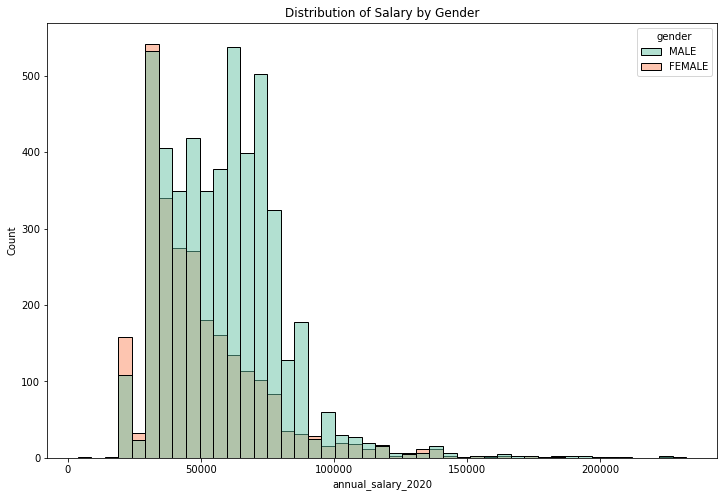

In [42]:
plt.figure(figsize=(12,8))
sns.histplot(data = train, x='annual_salary_2020', hue='gender', palette="Set2", bins = 45)

plt.title('Distribution of Salary by Gender')

plt.show()

visualize salary by gender with ethnicity

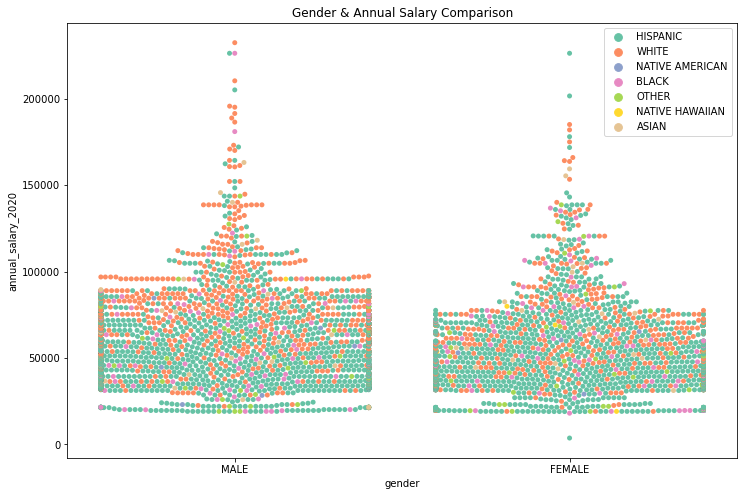

In [43]:
plt.figure(figsize=(12,8))
sns.swarmplot(x='gender', y="annual_salary_2020", data=train, hue="ethnicity", palette="Set2")
plt.legend()
plt.title('Gender & Annual Salary Comparison')

plt.show()

visualize years employed by gender

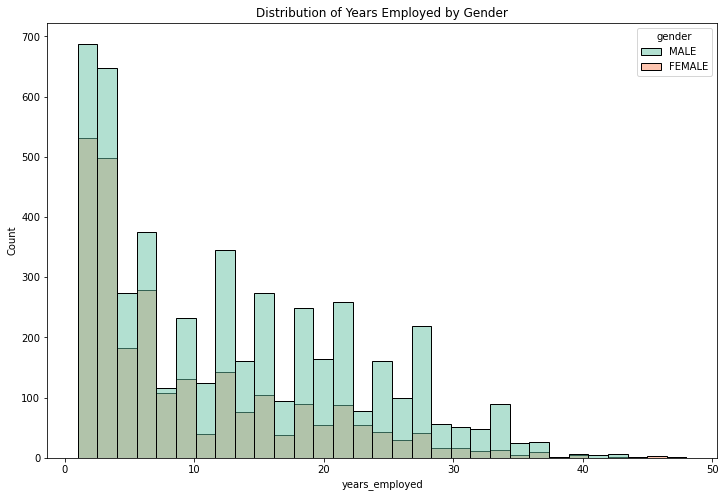

In [44]:
plt.figure(figsize=(12,8))
sns.histplot(data = train, x='years_employed', hue='gender', palette="Set2")

plt.title('Distribution of Years Employed by Gender')

plt.show()

visualize years employed by annual salary

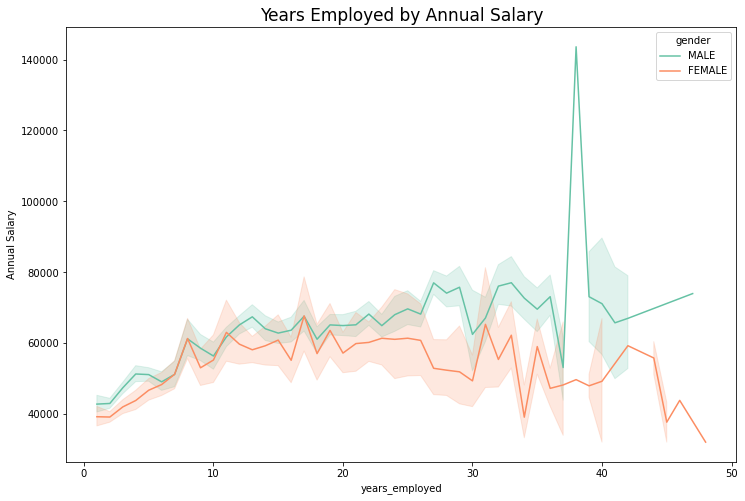

In [45]:
plt.figure('figure', figsize=(12, 8))
plt.title("Years Employed by Annual Salary", fontsize=17)
ax = sns.lineplot(x="years_employed", y="annual_salary_2020", data=train, hue='gender', palette=sns.color_palette("Set2", 2))
plt.ylabel('Annual Salary')

plt.show()

- The chart shows the pay gap between genders and shows Females consistently lagging behind their male counterparts

In [46]:
train[['annual_salary_2020', 'years_employed']].describe().T

,count,mean,std,min,25%,50%,75%,max
annual_salary_2020,7498.0,55513.357962,22853.941916,3729.0,36986.0,53748.0,69024.0,232298.0
years_employed,7498.0,11.611096,9.300534,1.0,4.0,9.0,19.0,48.0


In [47]:
print(df.groupby(['gender']).annual_salary_2020.median())

print(train.groupby(['gender']).annual_salary_2020.median())

gender
FEMALE    42940.0
MALE      59004.0
Name: annual_salary_2020, dtype: float64
gender
FEMALE    43385.0
MALE      59004.0
Name: annual_salary_2020, dtype: float64


Takeaways

- The median salary for males is 59,000 and 43,000 for Females

visualize employment by ethnicity

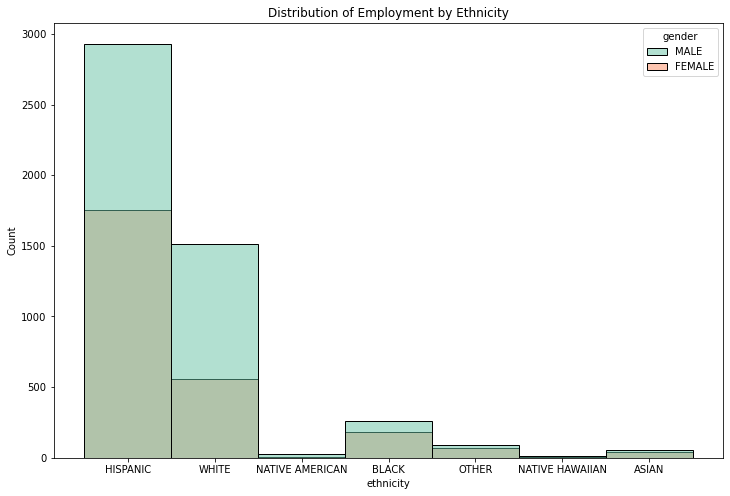

In [48]:
plt.figure(figsize=(12,8))
sns.histplot(data = train, x='ethnicity', hue='gender', palette="Set2")

plt.title('Distribution of Employment by Ethnicity')

plt.show()

visualize annual salary by ethnicity

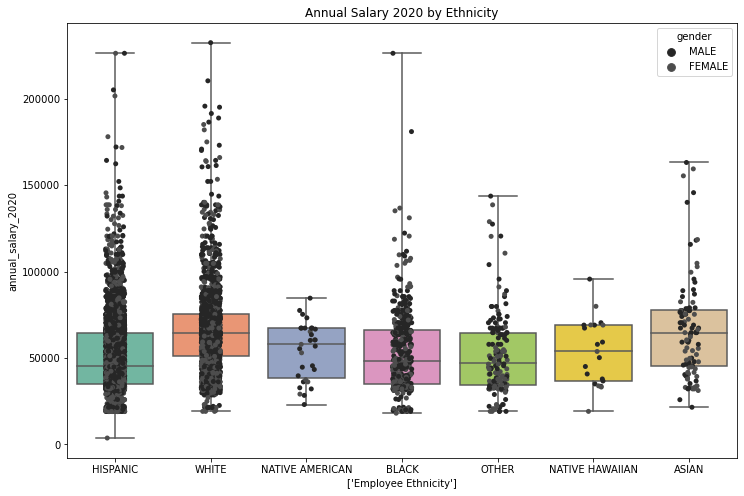

In [49]:
plt.figure(figsize=(12,8))

ax = sns.boxplot(x="ethnicity", y="annual_salary_2020", data=train,whis=np.inf, palette="Set2" )
ax = sns.stripplot(x="ethnicity", y="annual_salary_2020", data=train, color=".3",  hue='gender')
ax.set_xlabel(['Employee Ethnicity'])
plt.title('Annual Salary 2020 by Ethnicity')

plt.show()

### Hypothesis Testing

Chi^2 Testing

In [50]:
# Set our alpha
alpha = .05

#### Hypothesis 1 

Is there a relationship between a person gender and the department worked in

- $H_0$: Gender is independent of department worked in.
- $H_a$: Gender is not independent of department worked in.

In [51]:
# cross tab gender & department worked in

observed = pd.crosstab(train.gender, train.department)
observed.T

gender,FEMALE,MALE
department,,
311 CUSTOMER SERVICE,25,6
ANIMAL CARE SERVICES,45,25
ARTS & CULTURE,7,4
AVIATION,83,195
BUILDING & EQUIPMENT SERVICES,36,70
CENTER CITY DEVELOPMENT & OPERATIONS,34,60
CITY ATTORNEY,23,14
CITY AUDITOR,8,5
CITY CLERK,13,3


In [52]:
# chi2_contingency returns 4 different values

chi2, p, degf, expected = stats.chi2_contingency(observed)

In [53]:
null_hypothesis = "Gender is independent of department worked in"

if p < alpha:
    
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")

print( p)

We reject the hypothesis that Gender is independent of department worked in
0.0


take-ways:

   - The chi^2 test shows that there is a relationship between gender and department.

#### Hypothesis 2

Is there a relationship between a person ethnicity and the department worked in

- $H_0$: Ethnicity is independent of department worked in.
- $H_a$: Ethnicity is not independent of department worked in.


In [54]:
# cross ethnicity vs gender

observed = pd.crosstab(train.ethnicity, train.department)
observed.T

ethnicity,ASIAN,BLACK,HISPANIC,NATIVE AMERICAN,NATIVE HAWAIIAN,OTHER,WHITE
department,,,,,,,
311 CUSTOMER SERVICE,0,1,29,0,0,0,1
ANIMAL CARE SERVICES,1,0,34,0,0,3,32
ARTS & CULTURE,0,0,6,0,0,0,5
AVIATION,8,22,150,0,4,8,86
BUILDING & EQUIPMENT SERVICES,1,3,89,0,0,2,11
CENTER CITY DEVELOPMENT & OPERATIONS,4,2,77,0,1,1,9
CITY ATTORNEY,2,3,22,0,0,1,9
CITY AUDITOR,0,1,7,0,0,0,5
CITY CLERK,0,1,12,0,0,0,3


In [55]:
# chi2_contingency returns 4 different values

chi2, p, degf, expected = stats.chi2_contingency(observed)

In [56]:
null_hypothesis = "Ethnicity is independent of department worked in"

if p < alpha:
    
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")

print( p)

We reject the hypothesis that Ethnicity is independent of department worked in
1.3093711310588393e-88


take-ways:

   - The chi^2 test shows that there is a relationship between ethnicity and department.

#### Hypothesis 3

Is there a relationship between a persons gender and their annual salary

- $H_0$: Gender is independent of annual salary.
- $H_a$: Gender is not independent of annual salary.


In [57]:
observed = pd.crosstab(train.gender, train.annual_salary_2020)
observed.T

gender,FEMALE,MALE
annual_salary_2020,,
3729.0,1,0
18096.0,1,0
19032.0,7,0
19136.0,26,18
19552.0,10,2
...,...,...
201500.0,1,0
205000.0,0,1
210253.0,0,1


In [58]:
# chi2_contingency returns 4 different values

chi2, p, degf, expected = stats.chi2_contingency(observed)

In [59]:
null_hypothesis = "Gender is independent of annual salary"

if p < alpha:
    
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")

print(p)

We reject the hypothesis that Gender is independent of annual salary
4.68469439220996e-138


take-ways:

   - The chi^2 test shows that there is a relationship between gender and salary. 

#### Hypothesis 4

Is there a relationship between a persons ethnicity and their annual salary

- $H_0$: Ethnicity is independent of annual salary.
- $H_a$: Ethnicity is not independent of annual salary.

In [60]:
# cross ethnicity vs annual salary

observed = pd.crosstab(train.ethnicity, train.annual_salary_2020)
observed.T

ethnicity,ASIAN,BLACK,HISPANIC,NATIVE AMERICAN,NATIVE HAWAIIAN,OTHER,WHITE
annual_salary_2020,,,,,,,
3729.0,0,0,1,0,0,0,0
18096.0,0,1,0,0,0,0,0
19032.0,0,0,7,0,0,0,0
19136.0,0,4,31,0,1,5,3
19552.0,0,3,8,0,0,1,0
...,...,...,...,...,...,...,...
201500.0,0,0,1,0,0,0,0
205000.0,0,0,1,0,0,0,0
210253.0,0,0,0,0,0,0,1


In [61]:
null_hypothesis = "Ethnicity is independent of annual salary"

if p < alpha:
    
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")

print(p)

We reject the hypothesis that Ethnicity is independent of annual salary
4.68469439220996e-138


take-ways:

   - The chi^2 test shows that there is a relationship between ethnicity and salary. 
   

Changing tables for further analysis

In [62]:
dept_median_sal = df.groupby(['department', 'gender']).annual_salary_2020.median().reset_index(name='median_salary')

dept_median_sal.pivot_table(index=["department"], 
                    columns='gender', 
                    values=['median_salary'])

median_salary          
gender                                      FEMALE      MALE
department                                                  
311 CUSTOMER SERVICE                       35564.0   35218.5
ANIMAL CARE SERVICES                       39330.0   41682.0
ARTS & CULTURE                             65403.0   57308.0
AVIATION                                   40795.0   47799.0
BUILDING & EQUIPMENT SERVICES              33434.0   39706.0
CENTER CITY DEVELOPMENT & OPERATIONS       39620.0   34671.0
CITY ATTORNEY                              68340.0   81731.5
CITY AUDITOR                               72220.0  101779.0
CITY CLERK                                 43907.0   43907.0
CITY MANAGER                               72333.5  181987.5
CONVENTION & SPORTS FACILITIES             33434.0   34848.5
DEVELOPMENT SERVICES                       48802.0   48802.0
ECONOMIC DEVELOPMENT                       68462.0   69619.5
EQUITY                                     76270.0   79724.5
FINANCE                                    53880.0   55317.0
FIRE AND EMS                               61392.0   63480.0
GOVERNMENT & PUBLIC AFFAIRS                55768.0   60947.0
HEALTH                                     41032.5   46582.5
HISTORIC PRESERVATION                      58744.0   65667.5
HUMAN RESOURCES                            21590.5   28600.0
HUMAN SERVICES                             40842.0   48058.0
INFORMATION TECHNOLOGY SVCS                66777.0   77066.5
INNOVATION                                 93308.5   82000.0
LIBRARY                                    36715.0   36715.0
MANAGEMENT AND BUDGET                      63746.0   78922.0
MAYOR AND COUNCIL                          43349.0  128700.5
MUNICIPAL COURTS                           46477.0   45570.0
NEIGHBORHOOD & HOUSING SVCS                55295.0   61604.0
PARKS AND RECREATION                       29640.0   33880.0
PLANNING                                   60510.0   63265.0
POLICE                                     45000.0   70404.0
PRE K 4 SA                                 36207.0   36207.0
PUBLIC WORKS                               56090.0   44785.0
RISK MANAGEMENT                            53613.5   65088.0
SOLID WASTE MANAGEMENT                     39330.0   39706.0
SUSTAINABILITY                             63773.0  101862.0
WORLD HERITAGE                             84859.0   90565.0

take-ways:

The side by side comparison of the median salary based on gender and department appears to show that females are lagging behind their male counterparts.

In [63]:
ethnicity_dept_median_sal = df.groupby(['department', 'ethnicity']).annual_salary_2020.median().reset_index(name='median_salary')

ethnicity_dept_median_sal.pivot_table(index=["department"], 
                    columns='ethnicity', 
                    values=['median_salary'])

median_salary                     \
ethnicity                                    ASIAN     BLACK HISPANIC   
department                                                              
311 CUSTOMER SERVICE                           NaN   39935.5  35564.0   
ANIMAL CARE SERVICES                       39330.0   35765.5  39330.0   
ARTS & CULTURE                                 NaN       NaN  59479.0   
AVIATION                                   58284.0   41289.0  43046.0   
BUILDING & EQUIPMENT SERVICES              33434.0   48666.0  36861.0   
CENTER CITY DEVELOPMENT & OPERATIONS       49410.0   35327.0  33972.0   
CITY ATTORNEY                             118127.0   69758.5  60883.0   
CITY AUDITOR                                   NaN   72220.0  72236.0   
CITY CLERK                                     NaN   47616.0  43907.0   
CITY MANAGER                                   NaN   66014.0  72826.0   
CONVENTION & SPORTS FACILITIES             45422.5   33434.0  33529.0   
DEVELOPMENT SERVICES                       52500.0   49679.0  48802.0   
ECONOMIC DEVELOPMENT                       99682.0   66700.0  62000.0   
EQUITY                                         NaN   80891.0  76270.0   
FINANCE                                    66080.0   59160.0  51242.0   
FIRE AND EMS                               67296.0   63480.0  63480.0   
GOVERNMENT & PUBLIC AFFAIRS                    NaN   48891.0  63343.0   
HEALTH                                     48851.0   42775.5  39706.0   
HISTORIC PRESERVATION                      53175.0   57878.5  78029.0   
HUMAN RESOURCES                            47894.0   28059.0  24960.0   
HUMAN SERVICES                             65593.0   56507.5  39846.0   
INFORMATION TECHNOLOGY SVCS                78056.0   74954.0  66631.5   
INNOVATION                                     NaN   82000.0  87955.5   
LIBRARY                                    45510.0   39581.0  33880.0   
MANAGEMENT AND BUDGET                      47894.0   63746.0  76496.0   
MAYOR AND COUNCIL                          41682.0   43349.0  45083.0   
MUNICIPAL COURTS                               NaN   49769.0  45570.0   
NEIGHBORHOOD & HOUSING SVCS                70513.5   64447.0  54905.5   
PARKS AND RECREATION                       32779.0   29640.0  32893.0   
PLANNING                                   52015.0  109660.0  59636.0   
POLICE                                     64668.0   64668.0  64668.0   
PRE K 4 SA                                 34814.0   36207.0  36207.0   
PUBLIC WORKS                               79024.0   48213.0  43907.0   
RISK MANAGEMENT                            45899.0   73290.0  58186.0   
SOLID WASTE MANAGEMENT                     44785.0   38940.0  39393.0   
SUSTAINABILITY                                 NaN  107636.0  53736.0   
WORLD HERITAGE                                 NaN       NaN  90565.0   

                                                                               \
ethnicity                            NATIVE AMERICAN NATIVE HAWAIIAN    OTHER   
department                                                                      
311 CUSTOMER SERVICE                             NaN             NaN  34528.0   
ANIMAL CARE SERVICES                         45299.0             NaN  37345.0   
ARTS & CULTURE                                   NaN             NaN      NaN   
AVIATION                                     33880.0         39481.5  37120.0   
BUILDING & EQUIPMENT SERVICES                    NaN             NaN  42010.5   
CENTER CITY DEVELOPMENT & OPERATIONS             NaN         33653.0  62140.5   
CITY ATTORNEY                               112864.0         88239.0  86926.0   
CITY AUDITOR                                     NaN             NaN      NaN   
CITY CLERK                                       NaN             NaN      NaN   
CITY MANAGER                                     NaN             NaN      NaN   
CONVENTION & SPORTS FACILITIES               32997.5           

take-ways:

Table is showing the distinct differences in median salary based on ethnicty for each department. 

In [64]:
job_name_median_sal = df.groupby(['job_name', 'gender']).annual_salary_2020.median().reset_index(name='median_salary')

job_pivot = job_name_median_sal.pivot_table(index=["job_name"], 
                    columns='gender', 
                    values=['median_salary'])

job_pivot.head()

median_salary          
gender                                     FEMALE      MALE
job_name                                                   
 AUDITOR IV                              111899.0  101779.0
311 CUSTOMER SERVICE DIRECTOR            138048.0       NaN
311 SERVICE REPRESENTATIVE                35564.0   34528.0
ACCESSIBILITY COMPLIANCE MANAGER          81167.0       NaN
ACCESSIBILITY COMPLIANCE SPECIALIST       54200.0   60442.0

In [65]:
# creating two new data frames; one based on dept, gender, ethnicty and annual salary, the other based on those features and employee count on ethnicity

df2 = df.groupby(['department', 'gender', 'ethnicity' ]).annual_salary_2020.median().reset_index(name='median_salary')
df3 = df.groupby(['department', 'gender', 'ethnicity']).ethnicity.count().reset_index(name='employee_count')

# merge these two tables together so we can see employee counts based on department, gender, ethnicity, and median salary

df4 = pd.merge(df2, df3, how='left', on=['department', 'gender', 'ethnicity'], suffixes=['', '_'])
cols = ['department', 'gender', 'ethnicity', 'median_salary', 'employee_count']
df4 = df4[cols]

df4.head()

,department,gender,ethnicity,median_salary,employee_count
0,311 CUSTOMER SERVICE,FEMALE,BLACK,39935.5,2
1,311 CUSTOMER SERVICE,FEMALE,HISPANIC,35564.0,50
2,311 CUSTOMER SERVICE,FEMALE,OTHER,34528.0,1
3,311 CUSTOMER SERVICE,FEMALE,WHITE,35046.0,4
4,311 CUSTOMER SERVICE,MALE,HISPANIC,35218.5,8


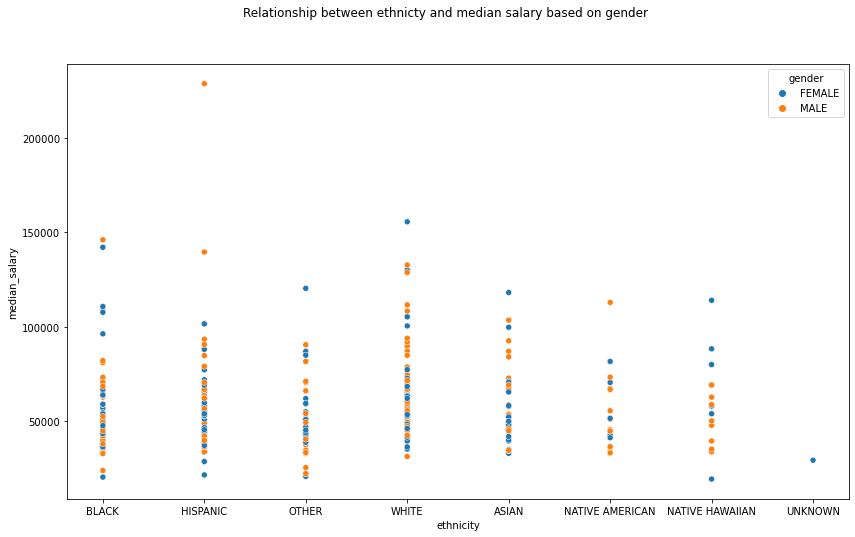

In [66]:
plt.figure(figsize=(14,8))
sns.scatterplot(x='ethnicity', y='median_salary',
               data=df2, hue='gender')

plt.suptitle('Relationship between ethnicty and median salary based on gender')

plt.show()

In [67]:
# tables are merged, can create a pivot table for easier viewing, leaving out employee counts

df4_pivot = df4.pivot_table(index=["gender", "ethnicity"], 
                    columns='department', 
                    values=['median_salary'])

df4_pivot.head(15)

median_salary                       \
department             311 CUSTOMER SERVICE ANIMAL CARE SERVICES   
gender ethnicity                                                   
FEMALE ASIAN                            NaN              39330.0   
       BLACK                        39935.5              33653.0   
       HISPANIC                     35564.0              38351.0   
       NATIVE AMERICAN                  NaN                  NaN   
       NATIVE HAWAIIAN                  NaN                  NaN   
       OTHER                        34528.0              38801.0   
       UNKNOWN                          NaN                  NaN   
       WHITE                        35046.0              40903.0   
MALE   ASIAN                            NaN                  NaN   
       BLACK                            NaN              37878.0   
       HISPANIC                     35218.5              41292.5   
       NATIVE AMERICAN                  NaN              45299.0   
       NATIVE HAWAIIAN                  NaN                  NaN   
       OTHER                            NaN              37345.0   
       WHITE                            NaN              50170.0   

                                                                              \
department             ARTS & CULTURE AVIATION BUILDING & EQUIPMENT SERVICES   
gender ethnicity                                                               
FEMALE ASIAN                      NaN  57620.5                           NaN   
       BLACK                      NaN  40763.0                       57626.0   
       HISPANIC               65403.0  40489.5                       33434.0   
       NATIVE AMERICAN            NaN      NaN                           NaN   
       NATIVE HAWAIIAN            NaN  33548.0                           NaN   
       OTHER                      NaN  39706.0                       51242.0   
       UNKNOWN                    NaN      NaN                           NaN   
       WHITE                  69347.0  47254.0                       54263.0   
MALE   ASIAN                      NaN  58522.0                       33434.0   
       BLACK                      NaN  42882.0                       39706.0   
       HISPANIC               55348.0  43611.0                       39706.0   
       NATIVE AMERICAN            NaN  33880.0                           NaN   
       NATIVE HAWAIIAN            NaN  47648.0                           NaN   
       OTHER                      NaN  33434.0                       32779.0   
       WHITE                  91206.0  59161.0                       40119.0   

                                                                           \
department             CENTER CITY DEVELOPMENT & OPERATIONS CITY ATTORNEY   
gender ethnicity                                                            
FEMALE ASIAN                                        49410.0      118127.0   
       BLACK                                        33880.0       70312.5   
       HISPANIC                                     38985.5       55394.0   
       NATIVE AMERICAN                                  NaN           NaN   
       NATIVE HAWAIIAN                                  NaN       88239.0   
       OTHER                                        33880.0       86926.0   
       UNKNOWN                                          NaN           NaN   
       WHITE                                        52147.0      105641.0   
MALE   ASIAN                                        66144.5           NaN   
       BLACK                                        62587.0       65041.5   
       HISPANIC                                     33880.0       84670.0   
       NATIVE AMERICAN                                  NaN      112864.0   
       NATIVE HAWAIIAN                              33653.0           NaN   
       OTHER                                        90401.0           NaN   
       WHITE                                        896

take-ways:

This table clearly lays out what was seen in the chi^2 testing. There are relationships between median salary, ethnicity, gender, and department. 


### Modeling


In [68]:
# seperate our X and y values

X_train = train.drop(columns=['gender', 'department', 'ethnicity', 'job_name', 'job_id'])
y_train = train.gender

X_validate = validate.drop(columns=['gender', 'department', 'ethnicity', 'job_name', 'job_id'])
y_validate = validate.gender

X_test = test.drop(columns=['gender', 'department', 'ethnicity', 'job_name', 'job_id'])
y_test = test.gender

### Baseline


In [69]:
# most frequenly observed outcome will be the baseline

train.gender.value_counts()

MALE      4878
FEMALE    2620
Name: gender, dtype: int64

In [70]:
baseline_accuracy = (round((train.gender == 'MALE').mean(), 2)* 100)

print(f'Our baseline accuracy is {baseline_accuracy}%')

Our baseline accuracy is 65.0%


### KNN Model


In [71]:
# make the model

knn = KNeighborsClassifier()

In [72]:
features = ['annual_salary_2020','base_pay_2020', 'leave_payout_2020', 'other_2020', 'overtime_2020', 'additional_compensation', 'total_compensation',
           'years_employed', 'ethnicity_ASIAN', 'ethnicity_BLACK', 'ethnicity_HISPANIC', 'ethnicity_NATIVE AMERICAN', 'ethnicity_NATIVE HAWAIIAN',
           'ethnicity_OTHER', 'ethnicity_WHITE']

In [73]:
# train the model

knn.fit(X_train[features], y_train)

# check accuracy

accuracy = knn.score(X_train[features], y_train)
print(f"accuracy is {accuracy:.3}")

accuracy is 0.8


In [74]:
# evaluate the model

y_pred = knn.predict(X_train[features])

In [75]:
# check other classification metrics
# y_train is the actual labels for the target variable
# y_pred is the predictions that the model makes based off our X features

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

      FEMALE       0.73      0.68      0.70      2620
        MALE       0.83      0.86      0.85      4878

    accuracy                           0.80      7498
   macro avg       0.78      0.77      0.78      7498
weighted avg       0.80      0.80      0.80      7498



In [76]:
# check the accuracy

accuracy = knn.score(X_validate[features], y_validate)
print(f"accuracy is {accuracy:.3}")

accuracy is 0.705


In [77]:
# predictions from the model

y_pred = knn.predict(X_validate[features])

In [78]:
# check the other classification metrics

print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

      FEMALE       0.58      0.54      0.56      1123
        MALE       0.76      0.79      0.78      2091

    accuracy                           0.70      3214
   macro avg       0.67      0.67      0.67      3214
weighted avg       0.70      0.70      0.70      3214



take-ways:

KNN did well on the train data but lost accuracy on validate.


### Random Forest

In [79]:
features = ['annual_salary_2020','base_pay_2020', 'leave_payout_2020', 'other_2020', 'overtime_2020', 'additional_compensation', 'total_compensation',
           'years_employed', 'ethnicity_ASIAN', 'ethnicity_BLACK', 'ethnicity_HISPANIC', 'ethnicity_NATIVE AMERICAN', 'ethnicity_NATIVE HAWAIIAN',
           'ethnicity_OTHER', 'ethnicity_WHITE']

In [80]:
def get_metrics_binary(rf):
    '''
    get_metrics_binary takes in a confusion matrix (cnf) for a binary classifier and prints out metrics based on
    values in variables named X_train, y_train, and y_pred.
    
    return: a classification report as a transposed DataFrame
    '''
    accuracy = rf.score(X_train[features], y_train)
    class_report = pd.DataFrame(classification_report(y_train, y_pred, output_dict=True)).T
    conf = confusion_matrix(y_train, y_pred)
    tpr = conf[1][1] / conf[1].sum()
    fpr = conf[0][1] / conf[0].sum()
    tnr = conf[0][0] / conf[0].sum()
    fnr = conf[1][0] / conf[1].sum()
    print(f'''
    The accuracy for our model is {accuracy:.4}
    The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
    The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
    ''')
    return class_report

In [81]:
# create the Random Forest Model

rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=100,
                            max_depth=10, 
                            random_state=123)

In [82]:
rf.fit(X_train[features], y_train)

RandomForestClassifier(max_depth=10, random_state=123)

In [83]:
y_pred = rf.predict(X_train[features])

In [84]:
y_pred_proba = rf.predict_proba(X_train[features])

In [85]:
class_report = get_metrics_binary(rf)
class_report


    The accuracy for our model is 0.8396
    The True Positive Rate is 0.864, The False Positive Rate is 0.206,
    The True Negative Rate is 0.794, and the False Negative Rate is 0.136
    


,precision,recall,f1-score,support
FEMALE,0.758294,0.793893,0.775685,2620.000000
MALE,0.886435,0.864084,0.875117,4878.000000
accuracy,0.839557,0.839557,0.839557,0.839557
macro avg,0.822365,0.828988,0.825401,7498.000000
weighted avg,0.841659,0.839557,0.840373,7498.000000


In [86]:
print('Accuracy of Validate: {:.2f}'.format(rf.score(X_validate[features], y_validate)))

y_pred = rf.predict(X_validate[features])

print(classification_report(y_validate, y_pred))


Accuracy of Validate: 0.74
              precision    recall  f1-score   support

      FEMALE       0.62      0.64      0.63      1123
        MALE       0.81      0.79      0.80      2091

    accuracy                           0.74      3214
   macro avg       0.71      0.72      0.72      3214
weighted avg       0.74      0.74      0.74      3214



take-ways:

Random Forest did well on train and validate data. Precision and Recall are fairly good.


### Decision Tree


In [87]:
# setting the max_depth argument
# clf = DecisionTreeClassifier(max_depth=3, random_state=123)

clf = DecisionTreeClassifier(max_depth=7, random_state=123)

# train our model on the training data
# fitting == training the model

clf = clf.fit(X_train, y_train)
clf

DecisionTreeClassifier(max_depth=7, random_state=123)

In [88]:
# predictions using this trained model

y_pred = clf.predict(X_train)

# estimate probabilities for each class

y_pred_proba = clf.predict_proba(X_train)

In [89]:
# evaluate the model

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.75


In [90]:
class_report = classification_report(y_train, y_pred, output_dict=True)
pd.DataFrame(class_report).T

,precision,recall,f1-score,support
FEMALE,0.632278,0.708779,0.668346,2620.000000
MALE,0.832712,0.778598,0.804746,4878.000000
accuracy,0.754201,0.754201,0.754201,0.754201
macro avg,0.732495,0.743688,0.736546,7498.000000
weighted avg,0.762675,0.754201,0.757084,7498.000000


In [91]:
y_pred = clf.predict(X_validate)

In [92]:
# compare actual y values from validate to predictions based on X_validate

print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

      FEMALE       0.59      0.67      0.63      1123
        MALE       0.81      0.75      0.78      2091

    accuracy                           0.72      3214
   macro avg       0.70      0.71      0.71      3214
weighted avg       0.73      0.72      0.73      3214



take-ways:

Decision Tree did the second best out of the four model but fell short of the Random Forest model. 


### Logistic Regression Model

In [93]:
#logistic regression

logit = LogisticRegression(random_state=123)

# specify the features we're using

features = ['annual_salary_2020','base_pay_2020', 'leave_payout_2020', 'other_2020', 'overtime_2020', 'additional_compensation', 'total_compensation',
           'years_employed', 'ethnicity_ASIAN', 'ethnicity_BLACK', 'ethnicity_HISPANIC', 'ethnicity_NATIVE AMERICAN', 'ethnicity_NATIVE HAWAIIAN',
           'ethnicity_OTHER', 'ethnicity_WHITE']

# fit a model using only specified features
# logit.fit(X_train[["age", "pclass", "fare"]], y_train)

logit.fit(X_train[features], y_train)

# fit on a subset, predict on that same subset of features

y_pred = logit.predict(X_train[features])

print("Baseline is", round(baseline_accuracy, 2))
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train[features], y_train)))

Baseline is 65.0
Accuracy of Logistic Regression classifier on training set: 0.67


In [94]:
# determine logit1's metrics on validate

features = ['annual_salary_2020','base_pay_2020', 'leave_payout_2020', 'other_2020', 'overtime_2020', 'additional_compensation', 'total_compensation',
           'years_employed', 'ethnicity_ASIAN', 'ethnicity_BLACK', 'ethnicity_HISPANIC', 'ethnicity_NATIVE AMERICAN', 'ethnicity_NATIVE HAWAIIAN',
           'ethnicity_OTHER', 'ethnicity_WHITE']
y_pred = logit.predict(X_validate[features])

print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_validate[features], y_validate)))

print('Logit1 model using salary data, ethnicity, and years employed')
print(classification_report(y_validate, y_pred))

Accuracy of Logistic Regression classifier on training set: 0.68
Logit1 model using salary data, ethnicity, and years employed
              precision    recall  f1-score   support

      FEMALE       0.56      0.35      0.43      1123
        MALE       0.71      0.85      0.77      2091

    accuracy                           0.68      3214
   macro avg       0.63      0.60      0.60      3214
weighted avg       0.66      0.68      0.65      3214



take-ways:

This model performed the worst out of the four models

In [95]:
logreg_train_accuracy = logit.score(X_train[features], y_train)
decisiontree_train_accuracy = clf.score(X_train, y_train)
random_forest_train_accuracy = rf.score(X_train[features], y_train)
knn_train_accuracy = knn.score(X_train[features], y_train)

logreg_validate_accuracy = logit.score(X_validate[features], y_validate)
decisiontree_validate_accuracy = clf.score(X_validate, y_validate)
random_forest_validate_accuracy = rf.score(X_validate[features], y_validate)
knn_validate_accuracy = knn.score(X_validate[features], y_validate)
print('\n')
print(f'The baseline accuracy is {baseline_accuracy}%')
print('\n')
print('Train Data Results')
print('--------------------')
print(f"Logistic Regression Train Accuracy --- {logreg_train_accuracy:.2%}")
print(f"Decision Tree Train Accuracy --- {decisiontree_train_accuracy:.2%}")
print(f"Random Forest Train Accuracy --- {random_forest_train_accuracy:.2%}")
print(f"KNN Accuracy Train Accuracy --- {knn_train_accuracy:.2%}")
print('\n')
print('Validate Data Results')
print('---------------------')
print(f"Logistic Regression Validate Accuracy --- {logreg_validate_accuracy:.2%}")
print(f"Decision Tree Validate Accuracy --- {decisiontree_validate_accuracy:.2%}")
print(f"Random Forest Validate Accuracy --- {random_forest_validate_accuracy:.2%}")
print(f"KNN Validate Accuracy --- {knn_validate_accuracy:.2%}")



The baseline accuracy is 65.0%


Train Data Results
--------------------
Logistic Regression Train Accuracy --- 67.36%
Decision Tree Train Accuracy --- 75.42%
Random Forest Train Accuracy --- 83.96%
KNN Accuracy Train Accuracy --- 79.95%


Validate Data Results
---------------------
Logistic Regression Validate Accuracy --- 67.55%
Decision Tree Validate Accuracy --- 72.43%
Random Forest Validate Accuracy --- 73.99%
KNN Validate Accuracy --- 70.47%


Test Accuracy

- Will use the Random Forest model, it performed better than all other models.

- Logistic Regression was the only model to peform below 70%.

- All models beat the baseline of 65%


### Test On Out-Sample Data

Chose to use Random Forest


In [96]:
random_forest_test_accuracy = rf.score(X_test[features], y_test)
print(f"Random Forest Accuracy --- {random_forest_test_accuracy:.2%}")

Random Forest Accuracy --- 74.95%


Run and look at the model

In [97]:
run_model()

,Actual_Gender,Model_Predictions,Model_Probabilities
REF #,,,
7774,FEMALE,FEMALE,0.429608
10298,FEMALE,FEMALE,0.354951
13111,FEMALE,FEMALE,0.240381
11112,MALE,MALE,0.626511
6940,FEMALE,MALE,0.622855
...,...,...,...
8192,MALE,FEMALE,0.492956
6305,MALE,MALE,0.950768
4177,MALE,MALE,0.771661


Key take-ways, Recommendations, & Next Steps

Key take-ways:

- There is a salary gap based on gender and on ethnicity

- Model performance has 75% accuracy when using features like salary, gender and ethnicity

Recommendations & next steps:

- Recommend that the city research further into the pay gaps and the possible reasons they have those gaps in salaries 

- Recommend that they look into developing a program to bring equality across gender and ethnicity

If I had more time:

- I would like to split up the salaries by department and time employeed to further investigating pay gap discrepancies

- Try other models and features

- Compare data from previous years to see if there is a trend
